# Introduction
Save a copy of this notebook in your Google Drive account.

Google Colab (formally Google Colaboratory) is an online service to host and execute python code through the browser, especially well suited to machine learning, data analysis and education. It's similar to a Jupyter Notebook that requires no setup to use and provide free access to computing resources, including GPUs.

In this example we'll utilize the CIFAR-10 dataset, which consists of 60,000 RGB images with 32x32 pixels belonging to 10 different classes (6,000 for each one). This dataset is split in training (50,000 images) and test (10,000 images) subdatasets.

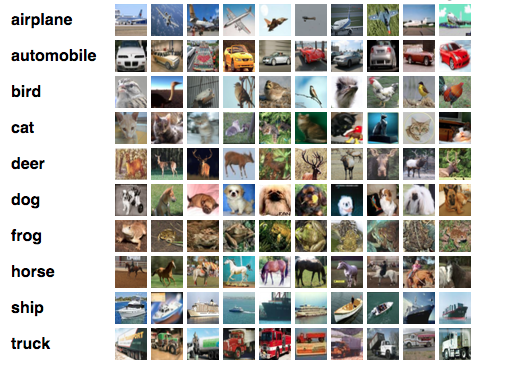

## Example

Importing libraries.

In [ ]:
# Check libcudnn8 version
!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# Install tensorflow
!pip install tflite-model-maker==0.4.0
!pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
!pip install pycocotools==2.0.4

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time

libcudnn8:
  Installed: 8.4.1.50-1+cuda11.6
  Candidate: 8.5.0.96-1+cuda11.7
  Version table:
     8.5.0.96-1+cuda11.7 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.5.0.96-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
 *** 8.4.1.50-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
        100 /var/lib/dpkg/status
     8.4.1.50-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda11.5 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  

Download and normalize the images and labels.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

Show samples

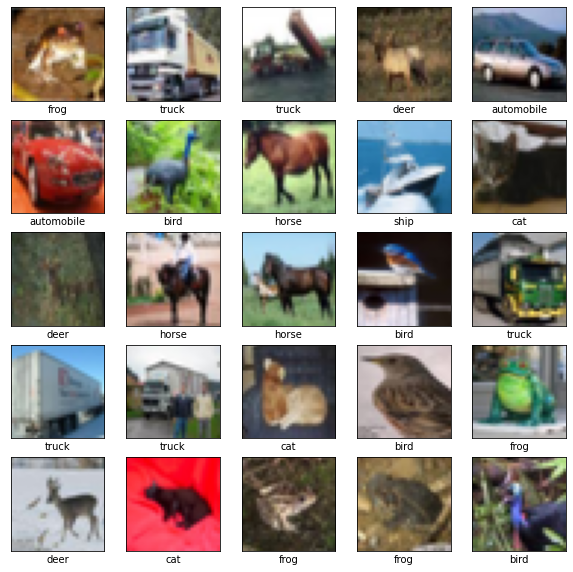

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Model and training main parameters

In [ ]:
#CHANGE HERE
model_size = [32, 64, 64, 128]
epochs = 15
batch_size = 16
activation = 'softmax' # None, 'softmax' or 'sigmoid'

Model Schema

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(model_size[0], (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(model_size[1], (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(model_size[2], (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(model_size[3], activation='relu'))
#model.add(layers.Dense(model_size[3], activation='relu'))
model.add(layers.Dense(10, activation = activation))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Compile and training the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
t0 = time.process_time()
history = model.fit(train_images, train_labels, epochs=epochs, 
                    validation_split=0.2,
                    batch_size = batch_size)
print(f'The training time was {time.process_time() - t0:.2f} seconds')

Epoch 1/15
2500/2500 [==============================] - 20s 4ms/step - loss: 1.5134 - accuracy: 0.4466 - val_loss: 1.2604 - val_accuracy: 0.5444
Epoch 2/15
2500/2500 [==============================] - 10s 4ms/step - loss: 1.1485 - accuracy: 0.5915 - val_loss: 1.1803 - val_accuracy: 0.5848
Epoch 3/15
2500/2500 [==============================] - 10s 4ms/step - loss: 0.9925 - accuracy: 0.6485 - val_loss: 1.0057 - val_accuracy: 0.6506
Epoch 4/15
2500/2500 [==============================] - 10s 4ms/step - loss: 0.8858 - accuracy: 0.6855 - val_loss: 1.0169 - val_accuracy: 0.6555
Epoch 5/15
2500/2500 [==============================] - 10s 4ms/step - loss: 0.8076 - accuracy: 0.7130 - val_loss: 0.9146 - val_accuracy: 0.6856
Epoch 6/15
2500/2500 [==============================] - 10s 4ms/step - loss: 0.7381 - accuracy: 0.7402 - val_loss: 0.8966 - val_accuracy: 0.6918
Epoch 7/15
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6730 - accuracy: 0.7614 - val_loss: 0.9039 - val_ac

KeyboardInterrupt: ignored

In [ ]:
!nvidia-smi

Show the results

In [ ]:
model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

Extra: saving results in google drive account.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#fig = plt.Figure(figsize=(10,10))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.savefig('/content/drive/My Drive/figure.png')

## Exercise:

Try other training parameters, following this table.

---

Student | Batch size | Epochs
--------|------------|---------
Aluno 1 | 16 | 10
Aluno 2 | 8 | 10
Aluno 3 | 32 | 10
Aluno 4 | 32 | 15
Aluno 5 | 32 | 20 
Aluno 6 | 128 | 15

---

Register your results in here [https://docs.google.com/document/d/1fYb2Rv36RDRX-K3OXkb3-YVZ0vGv5kb2DG6iahKB-_w/edit?usp=sharing].